In [18]:
from PIL import Image
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import time

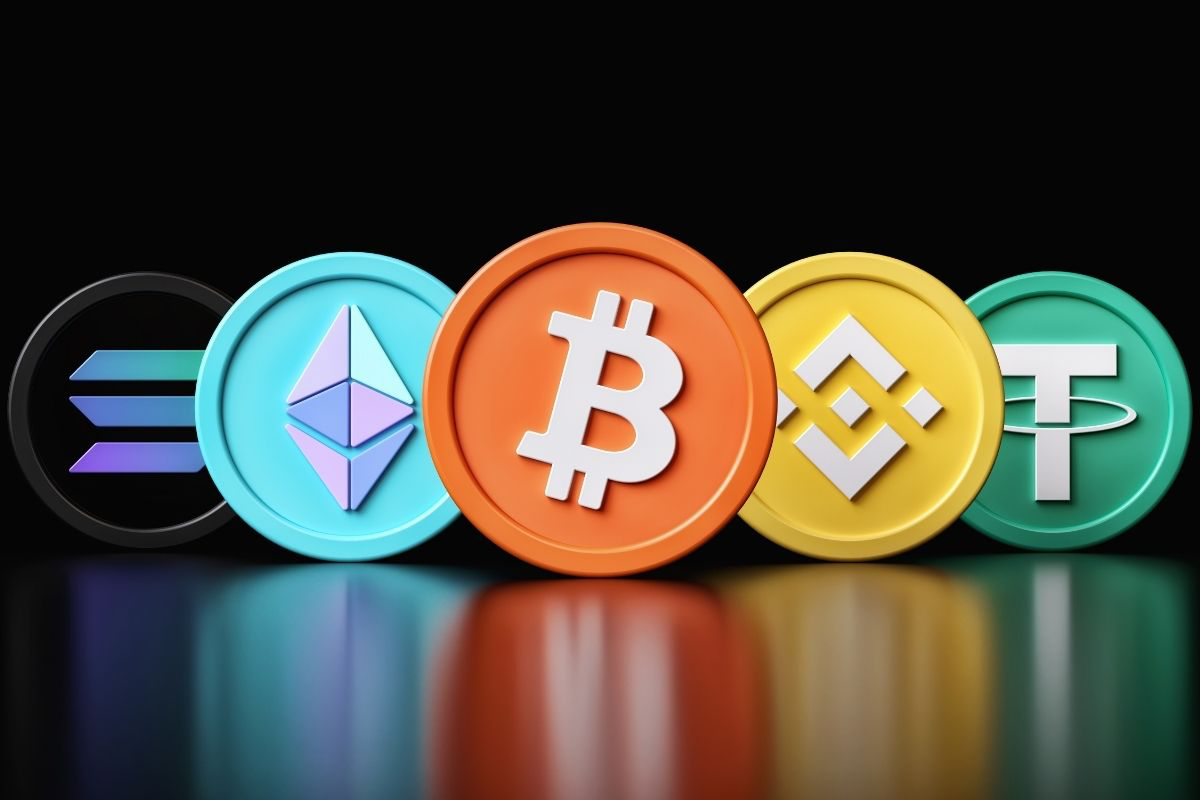

In [25]:
logo = Image.open('logo.jpg')
display(logo)

In [87]:
cmc = requests.get('https://coinmarketcap.com')
soup = BeautifulSoup(cmc.content, "html.parser")

data = soup.find('script', id='__NEXT_DATA__', type='application/json')
coins = {}
coin_data = json.loads(data.contents[0])

In [88]:
tmp = json.loads(coin_data['props']['initialState'])['cryptocurrency']['listingLatest']['data']

In [89]:
df = pd.DataFrame(tmp[1:])

In [90]:
df.drop(40, axis=1, inplace=True)

In [91]:
df.columns = tmp[0]['keysArr']

In [92]:
df.columns

Index(['ath', 'atl', 'circulatingSupply', 'cmcRank', 'dateAdded', 'high24h',
       'id', 'isActive', 'isAudited', 'lastUpdated', 'low24h',
       'marketPairCount', 'maxSupply', 'name', 'quote.USD.dominance',
       'quote.USD.fullyDilluttedMarketCap', 'quote.USD.lastUpdated',
       'quote.USD.marketCap', 'quote.USD.marketCapByTotalSupply',
       'quote.USD.name', 'quote.USD.percentChange1h',
       'quote.USD.percentChange1y', 'quote.USD.percentChange24h',
       'quote.USD.percentChange30d', 'quote.USD.percentChange60d',
       'quote.USD.percentChange7d', 'quote.USD.percentChange90d',
       'quote.USD.price', 'quote.USD.selfReportedMarketCap',
       'quote.USD.turnover', 'quote.USD.volume24h', 'quote.USD.volume30d',
       'quote.USD.volume7d', 'quote.USD.ytdPriceChangePercentage', 'rank',
       'selfReportedCirculatingSupply', 'slug', 'symbol', 'totalSupply',
       'tvl'],
      dtype='object')

In [93]:
df = df[['slug', 'symbol', 'quote.USD.price', 'quote.USD.percentChange1h', 'quote.USD.percentChange24h',
   'quote.USD.percentChange7d', 'quote.USD.marketCap', 'quote.USD.volume24h']]

In [94]:
df.columns = ['coin_name', 'coin_symbol', 'price', 'percent_change_1h', 'percent_change_24h', 
              'percent_change_7d', 'market_cap', 'volume_24h']

In [107]:
df['price'] / df.loc[df['coin_symbol'] == 'BTC', 'price'].values

0     1.000000e+00
1     5.511095e-02
2     2.261194e-05
3     6.957708e-03
4     2.227110e-03
          ...     
95    4.814739e-04
96    5.160445e-07
97    6.279672e-05
98    5.495954e-03
99    2.446754e-09
Name: price, Length: 100, dtype: float64